In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from efn_util import setup_IO
from tf_util.families import family_from_str
from MLE_util import load_dirichlet_MLE_model, dirichlet_MLE
import os;
import seaborn as sns
palette = sns.color_palette("Set1", n_colors=8, desat=.6);
sns.set_palette(palette);


basedir = '/Users/sbittner/Documents/efn/';

D = 3;
K = 1;
M = 1000;
nlayers = 2;

mu = np.array([1.0, 2.0, 3.0]);
scales = [0.001, 0.01, 0.1, 0.5];

exp_fam = 'dirichlet';
fam_class = family_from_str(exp_fam);

eta_dist = {'family':'isotropic_truncated_normal', 'mu':mu, \
            'scale':scales[0]};
family = fam_class(D, 1, eta_dist);

TIF_flow_type = 'PlanarFlowLayer';
flow_dict = {'latent_dynamics':None, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};

num_ds = 11;
num_rs = 10;
rs_list = range(1,num_rs+1);

dir_str = 'dirichlet_bv'

num_iters = 2000;
dirichlet_MLE_model = load_dirichlet_MLE_model(D);


In [2]:
MLE_NF_fname = basedir + 'results/' + dir_str + '/MLE_NF_%s_D=%d_bvt.npz' % (exp_fam, D);
if (False):
    print('loading!');
    npzfile = np.load(MLE_NF_fname);
    alpha_targs = npzfile['alpha_targs'];    
    NF_alphas = npzfile['NF_alphas'];
else:
    # do MLE for all VI dists
    alpha_targs = np.zeros((num_ds, D));
    NF_alphas = np.zeros((num_ds, num_rs, D));
    num_iters = 2000;
    for i in range(0,num_ds):
        ds = i;
        for j in range(num_rs):
            rs = rs_list[j];
            dist_info = {'dist_seed':ds};
            savedir = setup_IO(family, 'NF1', dir_str, '', K, M, flow_dict, {}, False, rs, dist_info);
            resdir = basedir + savedir;
            fname = resdir + 'results.npz';
            npzfile = np.load(fname);
            _X = npzfile['X'][0,:,:,0];
            print(_X.shape);
            params = npzfile['params'][()];
            alpha = params['alpha'];
            if (j==0):
                alpha_targs[i,:] = alpha;
            print('alpha', alpha, 'random seed', rs);
            alpha_hat = dirichlet_MLE(dirichlet_MLE_model, _X, num_iters);
            print('alpha hat', alpha_hat);
            NF_alphas[i,j,:] = alpha_hat;
            
    np.savez(MLE_NF_fname, alpha_targs=alpha_targs, NF_alphas=NF_alphas);
print('NFs done.');


(1000, 3)
alpha [1. 2. 3.] random seed 1
0 LL = 7.0388E+02
1000 LL = 1.2044E+03  delta = 4.05E-07 alpha =  [1.0649728 1.9454563 2.9837599]
2000 LL = 1.2044E+03  delta = 0.00E+00 alpha =  [1.0673633 1.9503276 2.991517 ]
alpha hat [1.0673633 1.9503276 2.991517 ]
(1000, 3)
alpha [1. 2. 3.] random seed 2
0 LL = 7.0689E+02
1000 LL = 1.2075E+03  delta = 1.11E-06 alpha =  [0.9883219 1.8529242 2.8486316]
2000 LL = 1.2077E+03  delta = -4.04E-07 alpha =  [1.0054542 1.889286  2.9067976]
alpha hat [1.0054542 1.889286  2.9067976]
(1000, 3)
alpha [1. 2. 3.] random seed 3
0 LL = -3.0513E+02
1000 LL = 1.1842E+03  delta = 1.96E-06 alpha =  [1.0107569 1.8728293 2.786728 ]
2000 LL = 1.1846E+03  delta = 0.00E+00 alpha =  [1.0327549 1.9187527 2.8576343]
alpha hat [1.0327549 1.9187527 2.8576343]
(1000, 3)
alpha [1. 2. 3.] random seed 4
0 LL = 5.8719E+02
1000 LL = 1.1839E+03  delta = 4.12E-07 alpha =  [1.0286139 1.9064393 2.8450205]
2000 LL = 1.1839E+03  delta = 4.12E-07 alpha =  [1.0321479 1.9137938 2.85640

2000 LL = 1.1776E+03  delta = 2.07E-07 alpha =  [0.96936697 1.8985729  2.7089937 ]
alpha hat [0.96936697 1.8985729  2.7089937 ]
(1000, 3)
alpha [1.17886285 2.04365099 3.00964975] random seed 1
0 LL = 8.3997E+02
1000 LL = 1.1560E+03  delta = 6.34E-07 alpha =  [1.2777115 2.0167203 3.0432928]
2000 LL = 1.1560E+03  delta = -8.45E-07 alpha =  [1.2876441 2.0335689 3.0696285]
alpha hat [1.2876441 2.0335689 3.0696285]
(1000, 3)
alpha [1.17886285 2.04365099 3.00964975] random seed 2
0 LL = -3.2564E+01
1000 LL = 1.1352E+03  delta = 0.00E+00 alpha =  [1.1624241 1.8904281 2.8598733]
2000 LL = 1.1353E+03  delta = -2.15E-07 alpha =  [1.1703912 1.9045273 2.8820307]
alpha hat [1.1703912 1.9045273 2.8820307]
(1000, 3)
alpha [1.17886285 2.04365099 3.00964975] random seed 3
0 LL = -5.6234E+02
1000 LL = 1.1465E+03  delta = 2.02E-06 alpha =  [1.1905497 1.974904  2.8781683]
2000 LL = 1.1468E+03  delta = -5.32E-07 alpha =  [1.2160208 2.0209053 2.9474988]
alpha hat [1.2160208 2.0209053 2.9474988]
(1000, 3)
al

1000 LL = 1.2563E+03  delta = 1.85E-06 alpha =  [1.1116736 1.9247652 3.2386956]
2000 LL = 1.2567E+03  delta = 9.71E-07 alpha =  [1.1355689 1.9704319 3.3189898]
alpha hat [1.1355689 1.9704319 3.3189898]
(1000, 3)
alpha [1.04412275 1.96691298 3.24307712] random seed 10
0 LL = -4.4473E+02
1000 LL = 1.2318E+03  delta = -3.96E-07 alpha =  [1.1106246 1.9136266 3.1857984]
2000 LL = 1.2318E+03  delta = -3.96E-07 alpha =  [1.112584  1.9173462 3.1922643]
alpha hat [1.112584  1.9173462 3.1922643]
(1000, 3)
alpha [0.96882163 2.07290039 3.02178208] random seed 1
0 LL = -1.6184E+03
1000 LL = 1.2248E+03  delta = 1.59E-06 alpha =  [0.99273175 1.9486029  2.8894045 ]
2000 LL = 1.2250E+03  delta = -1.99E-07 alpha =  [1.0096251 1.9863402 2.9473455]
alpha hat [1.0096251 1.9863402 2.9473455]
(1000, 3)
alpha [0.96882163 2.07290039 3.02178208] random seed 2
0 LL = 6.6605E+02
1000 LL = 1.2340E+03  delta = 0.00E+00 alpha =  [0.9716338 1.948669  2.9131403]
2000 LL = 1.2340E+03  delta = -9.89E-08 alpha =  [0.9726

0 LL = -3.4593E+01
1000 LL = 1.1687E+03  delta = 1.98E-06 alpha =  [1.0728639 2.0376887 2.780497 ]
2000 LL = 1.1688E+03  delta = -4.18E-07 alpha =  [1.0883847 2.0707073 2.8268044]
alpha hat [1.0883847 2.0707073 2.8268044]
(1000, 3)
alpha [1.00912047 2.10912827 2.80530297] random seed 9
0 LL = -7.4621E+00
1000 LL = 1.1581E+03  delta = 1.37E-06 alpha =  [1.0540109 2.0207381 2.7186084]
2000 LL = 1.1582E+03  delta = -2.11E-07 alpha =  [1.0653317 2.0451276 2.7523057]
alpha hat [1.0653317 2.0451276 2.7523057]
(1000, 3)
alpha [1.00912047 2.10912827 2.80530297] random seed 10
0 LL = -8.2428E+02
1000 LL = 1.1619E+03  delta = 4.31E-06 alpha =  [0.9799769 1.9139509 2.600686 ]
2000 LL = 1.1627E+03  delta = -3.15E-07 alpha =  [1.0106795 1.9823003 2.6963105]
alpha hat [1.0106795 1.9823003 2.6963105]
(1000, 3)
alpha [1.00011086 1.97104559 2.88839337] random seed 1
0 LL = -8.5413E+01
1000 LL = 1.1731E+03  delta = 6.76E-06 alpha =  [1.0261974 1.840531  2.7535708]
2000 LL = 1.1741E+03  delta = 4.16E-07 

In [ ]:
num_scales = len(scales);
EFN_alphas_all = [];
for i in range(num_scales):
    scale = scales[i];
    eta_dist = {'family':'isotropic_truncated_normal', 'mu':mu, \
            'scale':scale};
    family = fam_class(D, 1, eta_dist);
    MLE_EFN_fname = basedir + 'results/' + dir_str + '/MLE_EFN_%s_D=%d_scale=%.3f_bvt.npz' % (exp_fam, D, scale);
    if (False):
        print('loading EFN at scale %.3f!' % scale);
        npzfile = np.load(MLE_EFN_fname);  
        EFN_alphas = npzfile['EFN_alphas'];
    else:    
        # do MLE for the EFN dists
        K= 100;
        M = 1000;
        param_net_hps = {'L':4};
        param_net_input_type = 'eta';
        stochastic_eta = True;
        give_hint = False;

        EFN_alphas = np.zeros((num_ds, num_rs, D));
        # iterate over random seeds
        for j in range(num_rs):
            rs = rs_list[j];
            savedir = setup_IO(family, 'EFN', dir_str, param_net_input_type, K, M, flow_dict,\
                           param_net_hps, give_hint, rs);
            print('loading model %s ...' % savedir);
            resdir = basedir + savedir;
            fname = resdir + 'results.npz';
            npzfile = np.load(fname);

            sess = tf.Session();
            new_saver = tf.train.import_meta_graph(resdir + 'model.meta');
            new_saver.restore(sess, tf.train.latest_checkpoint(resdir));
            print('done.');
            Z0 = tf.get_collection('Z0')[0];
            X = tf.get_collection('X')[0];
            eta = tf.get_collection('eta')[0];
            param_net_input = tf.get_collection('param_net_input')[0];
            log_p_zs = tf.get_collection('log_p_zs')[0];

            for ds in range(num_ds):
                alpha = alpha_targs[ds];
                params = {'alpha':alpha};
                _eta, _param_net_input = family.mu_to_eta(params);

                N = 10000;
                z0 = np.random.normal(0,1,[K,N,D-1,1]);
                _eta = np.concatenate((np.expand_dims(_eta, 0), np.zeros((K-1, D))), 0);
                _param_net_input = np.concatenate((np.expand_dims(_param_net_input, 0), np.zeros((K-1, D))), 0);
                _X = sess.run(X, {Z0:z0, eta:_eta, param_net_input:_param_net_input});
                _X = _X[0,:,:,0];

                alpha_hat = dirichlet_MLE(dirichlet_MLE_model, _X, num_iters);
                print('targ', alpha, 'EFN', alpha_hat);
                EFN_alphas[ds, j, :] = alpha_hat;

        np.savez(MLE_EFN_fname, alpha_targs=alpha_targs, EFN_alphas=EFN_alphas);
    print('EFN scale=%.3f done.' % scale);
    EFN_alphas_all.append(EFN_alphas);
print(EFN_alphas_all);


loading model results/dirichlet_bv/EFN_dirichlet_itn_s=0.00_D=3_K=100_M=1000_flow=2P_L=4_rs=1/ ...
INFO:tensorflow:Restoring parameters from /Users/sbittner/Documents/efn/results/dirichlet_bv/EFN_dirichlet_itn_s=0.00_D=3_K=100_M=1000_flow=2P_L=4_rs=1/model
done.
0 LL = 1.0054E+04
1000 LL = 1.2192E+04  delta = 0.00E+00 alpha =  [0.9991067 2.0262713 2.8835883]
2000 LL = 1.2192E+04  delta = 0.00E+00 alpha =  [0.9991067 2.0262713 2.8835883]
targ [1. 2. 3.] EFN [0.9991067 2.0262713 2.8835883]
0 LL = -9.7114E+03
1000 LL = 1.1236E+04  delta = -4.35E-07 alpha =  [1.1685791 1.9506305 2.8133466]
2000 LL = 1.1236E+04  delta = -4.35E-07 alpha =  [1.1685791 1.9506305 2.8133466]
targ [1.16243454 1.93882436 2.94718282] EFN [1.1685791 1.9506305 2.8133466]
0 LL = 1.5979E+03
1000 LL = 1.2046E+04  delta = 0.00E+00 alpha =  [0.99180996 2.0588443  2.7903762 ]
2000 LL = 1.2046E+04  delta = 0.00E+00 alpha =  [0.99180996 2.0588443  2.7903762 ]
targ [0.95832422 1.99437332 2.78638039] EFN [0.99180996 2.0588443 

2000 LL = 1.1583E+04  delta = -2.53E-07 alpha =  [1.2510583 2.0169876 3.0442646]
targ [1.16905257 1.95340626 3.00328202] EFN [1.2510583 2.0169876 3.0442646]
0 LL = -5.9882E+03
1000 LL = 1.1999E+04  delta = 3.26E-07 alpha =  [1.0509619 2.1430275 2.8518958]
2000 LL = 1.1999E+04  delta = 3.26E-07 alpha =  [1.0509619 2.1430275 2.8518958]
targ [1.00912047 2.10912827 2.80530297] EFN [1.0509619 2.1430275 2.8518958]
0 LL = -1.3851E+04
1000 LL = 1.2121E+04  delta = 0.00E+00 alpha =  [1.0904607 2.0496814 3.0268893]
2000 LL = 1.2121E+04  delta = 0.00E+00 alpha =  [1.0904607 2.0496814 3.0268893]
targ [1.00011086 1.97104559 2.88839337] EFN [1.0904607 2.0496814 3.0268893]
0 LL = 4.5597E+03
1000 LL = 1.1548E+04  delta = -1.69E-07 alpha =  [1.1904225 2.122629  2.9033623]
2000 LL = 1.1548E+04  delta = -1.69E-07 alpha =  [1.1904225 2.122629  2.9033623]
targ [1.13315865 2.0715279  2.84545997] EFN [1.1904225 2.122629  2.9033623]
loading model results/dirichlet_bv/EFN_dirichlet_itn_s=0.00_D=3_K=100_M=1000_

targ [1.17886285 2.04365099 3.00964975] EFN [1.2538801 2.0361097 3.060302 ]
0 LL = 6.1391E+03
1000 LL = 1.2130E+04  delta = 0.00E+00 alpha =  [1.099214  2.1283839 3.0107477]
2000 LL = 1.2130E+04  delta = 0.00E+00 alpha =  [1.099214  2.1283839 3.0107477]
targ [1.00505617 2.04999513 2.90040911] EFN [1.099214  2.1283839 3.0107477]
0 LL = 3.7997E+03
1000 LL = 1.2429E+04  delta = -3.93E-07 alpha =  [1.1189427 2.0123756 3.221563 ]
2000 LL = 1.2429E+04  delta = -3.93E-07 alpha =  [1.1189427 2.0123756 3.221563 ]
targ [1.04412275 1.96691298 3.24307712] EFN [1.1189427 2.0123756 3.221563 ]
0 LL = -6.7569E+03
1000 LL = 1.2347E+04  delta = 2.37E-07 alpha =  [1.0482361 2.0814388 3.0272737]
2000 LL = 1.2347E+04  delta = 2.37E-07 alpha =  [1.0482361 2.0814388 3.0272737]
targ [0.96882163 2.07290039 3.02178208] EFN [1.0482361 2.0814388 3.0272737]
0 LL = 1.0503E+04
1000 LL = 1.1668E+04  delta = 0.00E+00 alpha =  [1.2553902 2.009731  3.0894802]
2000 LL = 1.1668E+04  delta = 0.00E+00 alpha =  [1.2553902 2.

done.
0 LL = -1.0033E+04
1000 LL = 1.2672E+04  delta = -1.54E-07 alpha =  [1.0197614 2.0619113 3.1120574]
2000 LL = 1.2672E+04  delta = 0.00E+00 alpha =  [1.0197613 2.0619113 3.1120574]
targ [1. 2. 3.] EFN [1.0197613 2.0619113 3.1120574]
0 LL = -1.7113E+04
1000 LL = 1.1790E+04  delta = -2.48E-07 alpha =  [1.2279447 1.9907968 3.115693 ]
2000 LL = 1.1790E+04  delta = -2.48E-07 alpha =  [1.2279447 1.9907968 3.115693 ]
targ [1.16243454 1.93882436 2.94718282] EFN [1.2279447 1.9907968 3.115693 ]
0 LL = -1.9766E+04
1000 LL = 1.2420E+04  delta = 0.00E+00 alpha =  [0.99546474 2.0418594  2.9618661 ]
2000 LL = 1.2420E+04  delta = 0.00E+00 alpha =  [0.99546474 2.0418594  2.9618661 ]
targ [0.95832422 1.99437332 2.78638039] EFN [0.99546474 2.0418594  2.9618661 ]
0 LL = 8.7869E+03
1000 LL = 1.1737E+04  delta = -2.50E-07 alpha =  [1.2133377 2.016133  3.0650816]
2000 LL = 1.1737E+04  delta = -2.50E-07 alpha =  [1.2133377 2.016133  3.0650816]
targ [1.17886285 2.04365099 3.00964975] EFN [1.2133377 2.0161

2000 LL = 1.1749E+04  delta = -5.82E-07 alpha =  [0.99775034 2.0933678  2.6583645 ]
targ [1.00912047 2.10912827 2.80530297] EFN [0.99775034 2.0933678  2.6583645 ]
0 LL = -4.0732E+02
1000 LL = 1.1907E+04  delta = 0.00E+00 alpha =  [1.0080477 1.9720696 2.8113813]
2000 LL = 1.1907E+04  delta = 0.00E+00 alpha =  [1.0080477 1.9720696 2.8113813]
targ [1.00011086 1.97104559 2.88839337] EFN [1.0080477 1.9720696 2.8113813]
0 LL = 2.8854E+03
1000 LL = 1.1246E+04  delta = 0.00E+00 alpha =  [1.1316798 2.036566  2.7246544]
2000 LL = 1.1246E+04  delta = 0.00E+00 alpha =  [1.1316798 2.036566  2.7246544]
targ [1.13315865 2.0715279  2.84545997] EFN [1.1316798 2.036566  2.7246544]
loading model results/dirichlet_bv/EFN_dirichlet_itn_s=0.01_D=3_K=100_M=1000_flow=2P_L=4_rs=2/ ...
INFO:tensorflow:Restoring parameters from /Users/sbittner/Documents/efn/results/dirichlet_bv/EFN_dirichlet_itn_s=0.01_D=3_K=100_M=1000_flow=2P_L=4_rs=2/model
done.
0 LL = -5.7316E+03
1000 LL = 1.2685E+04  delta = 3.85E-07 alpha =

targ [1.00505617 2.04999513 2.90040911] EFN [1.0348666 2.1006286 2.9369922]
0 LL = 9.3716E+03
1000 LL = 1.2977E+04  delta = 0.00E+00 alpha =  [1.0595143 2.013148  3.3407497]
2000 LL = 1.2977E+04  delta = 0.00E+00 alpha =  [1.0595143 2.013148  3.3407497]
targ [1.04412275 1.96691298 3.24307712] EFN [1.0595143 2.013148  3.3407497]
0 LL = 2.7161E+03
1000 LL = 1.2676E+04  delta = 0.00E+00 alpha =  [0.97834045 2.0851882  3.0074794 ]
2000 LL = 1.2676E+04  delta = 0.00E+00 alpha =  [0.97834045 2.0851882  3.0074794 ]
targ [0.96882163 2.07290039 3.02178208] EFN [0.97834045 2.0851882  3.0074794 ]
0 LL = -1.1909E+04
1000 LL = 1.1783E+04  delta = 0.00E+00 alpha =  [1.1835684 1.9889653 3.0539775]
2000 LL = 1.1783E+04  delta = 0.00E+00 alpha =  [1.1835684 1.9889653 3.0539775]
targ [1.16905257 1.95340626 3.00328202] EFN [1.1835684 1.9889653 3.0539775]
0 LL = 8.9695E+03
1000 LL = 1.2271E+04  delta = -3.98E-07 alpha =  [1.0396812 2.2083328 2.910442 ]
2000 LL = 1.2271E+04  delta = -3.98E-07 alpha =  [1.0

0 LL = 2.5300E+03
1000 LL = 1.1529E+04  delta = -1.69E-07 alpha =  [1.1967132 1.885827  2.9959   ]
2000 LL = 1.1529E+04  delta = -1.69E-07 alpha =  [1.1967132 1.885827  2.9959   ]
targ [1.16243454 1.93882436 2.94718282] EFN [1.1967132 1.885827  2.9959   ]
0 LL = 6.9923E+03
1000 LL = 1.1827E+04  delta = 0.00E+00 alpha =  [1.0415491 1.9429023 2.8581839]
2000 LL = 1.1827E+04  delta = 0.00E+00 alpha =  [1.0415491 1.9429023 2.8581839]
targ [0.95832422 1.99437332 2.78638039] EFN [1.0415491 1.9429023 2.8581839]
0 LL = -7.1285E+03
1000 LL = 1.1686E+04  delta = 4.18E-07 alpha =  [1.2108145 1.9284245 3.067885 ]
2000 LL = 1.1686E+04  delta = 4.18E-07 alpha =  [1.2108145 1.9284245 3.067885 ]
targ [1.17886285 2.04365099 3.00964975] EFN [1.2108145 1.9284245 3.067885 ]
0 LL = 1.9867E+03
1000 LL = 1.2119E+04  delta = 1.61E-07 alpha =  [1.0659616 2.009445  2.9972658]
2000 LL = 1.2119E+04  delta = 1.61E-07 alpha =  [1.0659616 2.009445  2.9972658]
targ [1.00505617 2.04999513 2.90040911] EFN [1.0659616 2.

2000 LL = 1.2419E+04  delta = -3.93E-07 alpha =  [1.0347677 2.0620646 3.0383751]
targ [1.00011086 1.97104559 2.88839337] EFN [1.0347677 2.0620646 3.0383751]
0 LL = 4.0074E+03
1000 LL = 1.1710E+04  delta = 0.00E+00 alpha =  [1.1407634 2.125952  2.8983893]
2000 LL = 1.1710E+04  delta = 0.00E+00 alpha =  [1.1407634 2.125952  2.8983893]
targ [1.13315865 2.0715279  2.84545997] EFN [1.1407634 2.125952  2.8983893]
loading model results/dirichlet_bv/EFN_dirichlet_itn_s=0.01_D=3_K=100_M=1000_flow=2P_L=4_rs=10/ ...
INFO:tensorflow:Restoring parameters from /Users/sbittner/Documents/efn/results/dirichlet_bv/EFN_dirichlet_itn_s=0.01_D=3_K=100_M=1000_flow=2P_L=4_rs=10/model
done.
0 LL = -1.9158E+04
1000 LL = 1.2524E+04  delta = 0.00E+00 alpha =  [0.99551547 2.0280795  3.0109968 ]
2000 LL = 1.2524E+04  delta = 0.00E+00 alpha =  [0.99551547 2.0280795  3.0109968 ]
targ [1. 2. 3.] EFN [0.99551547 2.0280795  3.0109968 ]
0 LL = 4.0669E+01
1000 LL = 1.1479E+04  delta = 0.00E+00 alpha =  [1.144596  1.86531

In [4]:
# bias function
def param_bias_variance(x, x_hat):
    E_x_hat = np.nanmean(x_hat, 0);
    bias = E_x_hat - x;
    diffs = x_hat - np.expand_dims(E_x_hat, 0);
    variance = np.nanmean(np.square(diffs), 0);
    return bias, variance;

NF_biases = np.zeros((num_ds, D));
NF_variances = np.zeros((num_ds, D));
EFN_biases = np.zeros((num_scales, num_ds, D));
EFN_variances = np.zeros((num_scales, num_ds, D));

for i in range(num_ds):
    NF_biases[i,:], NF_variances[i,:] = param_bias_variance(alpha_targs[i], NF_alphas[i,:,:]);
    for j in range(num_scales):
        EFN_alphas = EFN_alphas_all[j];
        EFN_biases[j,i,:], EFN_variances[j,i,:] = param_bias_variance(alpha_targs[i], EFN_alphas[i,:,:]);

In [5]:
NF_biases_norm = np.linalg.norm(NF_biases, ord=2, axis=1);
NF_variances_norm = np.linalg.norm(NF_variances, ord=2, axis=1);
EFN_biases_norm_all = [];
EFN_variances_norm_all = [];
for i in range(num_scales):
    EFN_biases_norm_all.append(np.linalg.norm(EFN_biases[i], ord=2, axis=1));
    EFN_variances_norm_all.append(np.linalg.norm(EFN_variances[i], ord=2, axis=1));

for i in range(num_ds):
    print('******************** ds = %d **********************' % i);
    print('NF  bias', NF_biases_norm[i]);
    print('NF  variance', NF_variances_norm[i]);
    for j in range(num_scales):
        scale = scales[j];
        print('******************** scale = %.3f **********************' % scale);
        print('EFN bias', EFN_biases_norm_all[j][i]);
        print('EFN variance', EFN_variances_norm_all[j][i]);


******************** ds = 0 **********************
NF  bias 0.10403361093236708
NF  variance 0.1209492172417276
******************** scale = 0.001 **********************
EFN bias 0.07094381047918778
EFN variance 0.005497867443433261
******************** scale = 0.010 **********************
EFN bias 0.05061236461305104
EFN variance 0.005333220000528924
******************** scale = 0.100 **********************
EFN bias 0.025263243021594415
EFN variance 0.005485476110187443
******************** scale = 0.500 **********************
EFN bias 0.03687382189801402
EFN variance 0.0027782015360549605


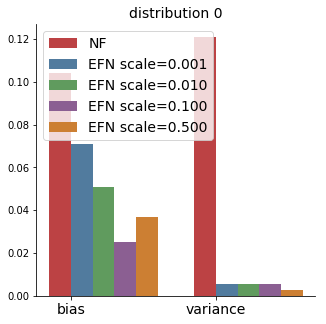

In [10]:
legendstrs = ['NF'];
for i in range(num_scales):
    scale = scales[i];
    legendstrs.append('EFN scale=%.3f' % scale);

width = 0.15;
fontsize = 14;
ind = np.arange(2);
for ds in range(num_ds):
    plt.figure();
    ax.bar(ind, np.array([NF_biases_norm[ds], NF_variances_norm[ds]]), width, color=palette[0]);
    for i in range(num_scales):
        EFN_biases_norm = EFN_biases_norm_all[i];
        EFN_variances_norm = EFN_variances_norm_all[i];
        ax.bar(ind + (i+1)*width, np.array([EFN_biases_norm[ds], EFN_variances_norm[ds]]), width, color=palette[i+1]);
    
    ax.legend(legendstrs, loc=2, fontsize=fontsize);
    ax.set_ylabel('', fontsize=fontsize)
    ax.set_title('distribution %d' % ds, fontsize=fontsize)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(['bias', 'variance'], fontsize=fontsize);
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show();


In [ ]:
mu = np.array([1.0, 2.0, 3.0]);
eta_dist = {'family':'isotropic_truncated_normal', 'mu':mu, \
            'scale':0.01};
eta_density = get_density_func(eta_dist, D);

densities = np.zeros((K,));
for i in range(K):
    alpha_i = alpha_targs[i,:]
    densities[i] = eta_density(alpha_i);
    
print(densities);

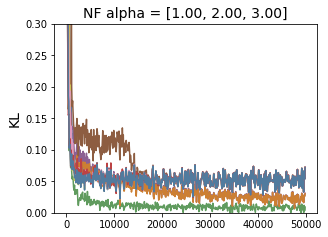

In [10]:
fontsize = 14;
ds_list = [0];
plt.figure(figsize=(16,16));
for i in range(num_ds):
    ds = ds_list[i];
    plt.subplot(4,3,i+1);
    
    for j in range(num_rs):
        rs = rs_list[j];
        dist_info = {'dist_seed':ds};
        savedir = setup_IO(family, 'NF1', dir_str, '', K, M, flow_dict, {}, False, rs, dist_info);
        resdir = basedir + savedir;
        fname = resdir + 'results.npz';
        try:
            npzfile = np.load(fname);
            KLs = npzfile['test_KLs'];
        except:
            continue;
        check_rate = npzfile['check_rate'];
        final_it = int((npzfile['it']+1)/check_rate);
        its = np.arange(0, check_rate*final_it, check_rate);
        plt.plot(its, KLs[:final_it]);
        plt.ylabel('KL', fontsize=fontsize)
        plt.ylim([0,.3]);
        plt.title('NF alpha = [%.2f, %.2f, %.2f]' % (alpha_targs[i,0], alpha_targs[i,1], alpha_targs[i,2]), fontsize=fontsize);
plt.show();

(500, 100) (512, 100)
(500, 100) (512, 100)
(500, 100) (512, 100)
(500, 100) (512, 100)
(500, 100) (512, 100)
(500, 100) (512, 100)
(500, 100) (512, 100)
(500, 100) (512, 100)
(500, 100) (512, 100)
(500, 100) (512, 100)


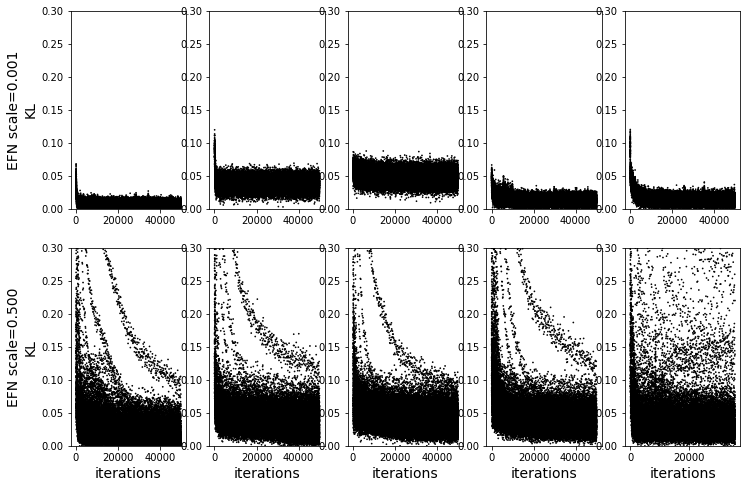

In [32]:
K= 100;
M = 1000;
param_net_hps = {'L':4};
param_net_input_type = 'eta';
give_hint = False;      
rs_list = range(1,num_rs+1);
max_cols = 5;
num_cols = min(max_cols, num_rs);
plt.figure(figsize=(12,8));        
for i in range(num_scales):
    scale = scales[i];
    eta_dist = {'family':'isotropic_truncated_normal', 'mu':mu, \
            'scale':scale};
    family = fam_class(D, 1, eta_dist);
    for j in range(num_cols):
        rs = rs_list[j];
        savedir = setup_IO(family, 'EFN', dir_str, param_net_input_type, K, M, flow_dict,\
                       param_net_hps, give_hint, rs);
        resdir = basedir + savedir;
        fname = resdir + 'results.npz';
        try:
            npzfile = np.load(fname);
            KLs = npzfile['test_KLs'];
        except:
            continue;

        check_rate = npzfile['check_rate'];
        final_it = int((npzfile['it']+1)/check_rate);
        
        plt.subplot(num_scales,num_cols,i*num_cols+j+1);
        its = np.arange(0, check_rate*final_it, check_rate);
        its = np.tile(np.expand_dims(its,1), [1, KLs.shape[1]]);
        s = .5*np.ones_like(its);
        print(its.shape, KLs.shape)
        plt.scatter(its, KLs[:final_it], s=s, c='k', );
        plt.ylim([0,.3]);
        if (i==(num_scales-1)):
            plt.xlabel('iterations', fontsize=fontsize);
        if (j==0):
            plt.ylabel('EFN scale=%.3f\nKL' % scale, fontsize=fontsize)

plt.show();